In [145]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [146]:
# Load the data
df = pd.read_excel('System_Data_selected.xlsx')


# Check the first few rows of the DataFrame
df.head()


,Number,Gender,Age,Height (ft),Weight (kg),Eyes,Nose,Teeth,Scars,Limbs,...,Leadership,Obedience,Courage,Aptitude Test,Oral Interview,Blood pressure,Toxicology,Underlying condition,Selected,Year
0,1,Male,20,5.4,70,Normal,Normal,Normal,Normal,Normal,...,60,55,75,85,85,Normal,Positive,Negative,No,2022
1,2,Male,20,5.9,65,Normal,Normal,Abnormal,Normal,Normal,...,80,75,50,70,80,Normal,Negative,Positive,No,2022
2,3,Male,19,5.9,55,Normal,Normal,Normal,Normal,Normal,...,75,70,65,85,70,Normal,Negative,Negative,Yes,2022
3,4,Male,18,5.9,60,Normal,Normal,Abnormal,Normal,Normal,...,85,90,55,65,55,Normal,Negative,Negative,No,2022
4,5,Male,19,5.9,65,Normal,Normal,Normal,Normal,Normal,...,75,50,80,85,50,Normal,Positive,Negative,No,2022


In [147]:
# Replace 'no' with 'No' in the 'Selected' column
df['Selected'] = df['Selected'].replace('no', 'No')
df['Eyes'] = df['Eyes'].replace('Normal ','Normal')
df['Nose'] = df['Nose'].replace('Normal ','Normal')
df['Teeth'] = df['Teeth'].replace('Normal ','Normal')
df['Teeth'] = df['Teeth'].replace('normal','Normal')
df['Teeth'] = df['Teeth'].replace('Abnormal ','Abnormal')
df['Scars'] = df['Scars'].replace('Normal ','Normal')
df['Scars'] = df['Scars'].replace('Abnormal ','Abnormal')
df['Limbs'] = df['Limbs'].replace('Normal ','Normal')
df['Limbs'] = df['Limbs'].replace('Abnormal ','Abnormal')
df['Blood pressure'] = df['Blood pressure'].replace('normal','Normal')


In [148]:
df.describe(include='object')

,Gender,Eyes,Nose,Teeth,Scars,Limbs,Blood pressure,Toxicology,Underlying condition,Selected
count,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304
unique,2,2,2,2,2,2,2,2,2,2
top,Male,Normal,Normal,Normal,Normal,Normal,Normal,Negative,Negative,No
freq,1747,2259,2244,1889,1812,2266,1703,1852,1730,1854


In [149]:
df['Selected'].value_counts()

Selected
No     1854
Yes     450
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Selected'>

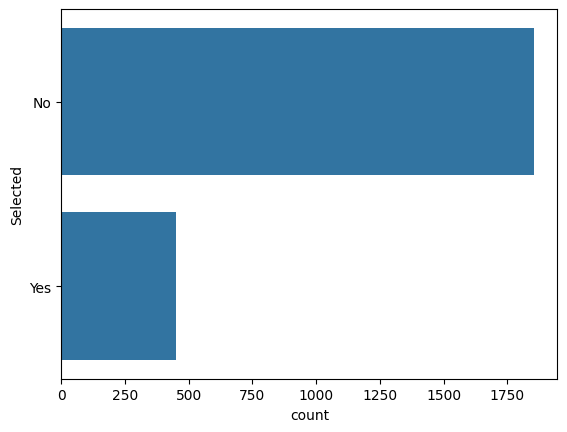

In [150]:
# Check the distribution of the target variable
sns.countplot(df['Selected'])

In [151]:
# Check for missing values
df.isnull().sum()


Number                  0
Gender                  0
Age                     0
Height (ft)             0
Weight (kg)             0
Eyes                    0
Nose                    0
Teeth                   0
Scars                   0
Limbs                   0
3 mile run              0
Sit ups                 0
Push ups                0
Leadership              0
 Obedience              0
Courage                 0
Aptitude Test           0
Oral Interview          0
Blood pressure          0
Toxicology              0
Underlying condition    0
Selected                0
Year                    0
dtype: int64

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                2304 non-null   int64  
 1   Gender                2304 non-null   object 
 2   Age                   2304 non-null   int64  
 3   Height (ft)           2304 non-null   float64
 4   Weight (kg)           2304 non-null   int64  
 5   Eyes                  2304 non-null   object 
 6   Nose                  2304 non-null   object 
 7   Teeth                 2304 non-null   object 
 8   Scars                 2304 non-null   object 
 9   Limbs                 2304 non-null   object 
 10  3 mile run            2304 non-null   int64  
 11  Sit ups               2304 non-null   int64  
 12  Push ups              2304 non-null   int64  
 13  Leadership            2304 non-null   int64  
 14   Obedience            2304 non-null   int64  
 15  Courage              

In [153]:
df.rename(columns = {'Height (ft)':'Height',
                    'Weight (kg)':'Weight',
                    ' 3 mile run':'3_mile_run',
                    'Sit ups ':'Sit_ups ',
                    'Push ups':'Push_ups',
                    'Aptitude Test':'Aptitude_Test',
                    'Oral Interview':'Oral_Interview',
                    'Blood pressure':'Blood_pressure',
                    'Underlying condition':'Underlying_condition'}, inplace = True)

In [154]:
df[['Gender', 'Eyes', 'Nose', 'Teeth', 'Scars', 'Limbs', 'Blood_pressure', 'Toxicology', 'Underlying_condition', 'Selected']] = df[['Gender', 'Eyes', 'Nose', 'Teeth', 'Scars', 'Limbs', 'Blood_pressure', 'Toxicology', 'Underlying_condition', 'Selected']].astype(str)

In [155]:
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [156]:
# Fill missing values with the median of the column
df.fillna(df.median(), inplace=True)



<Axes: >

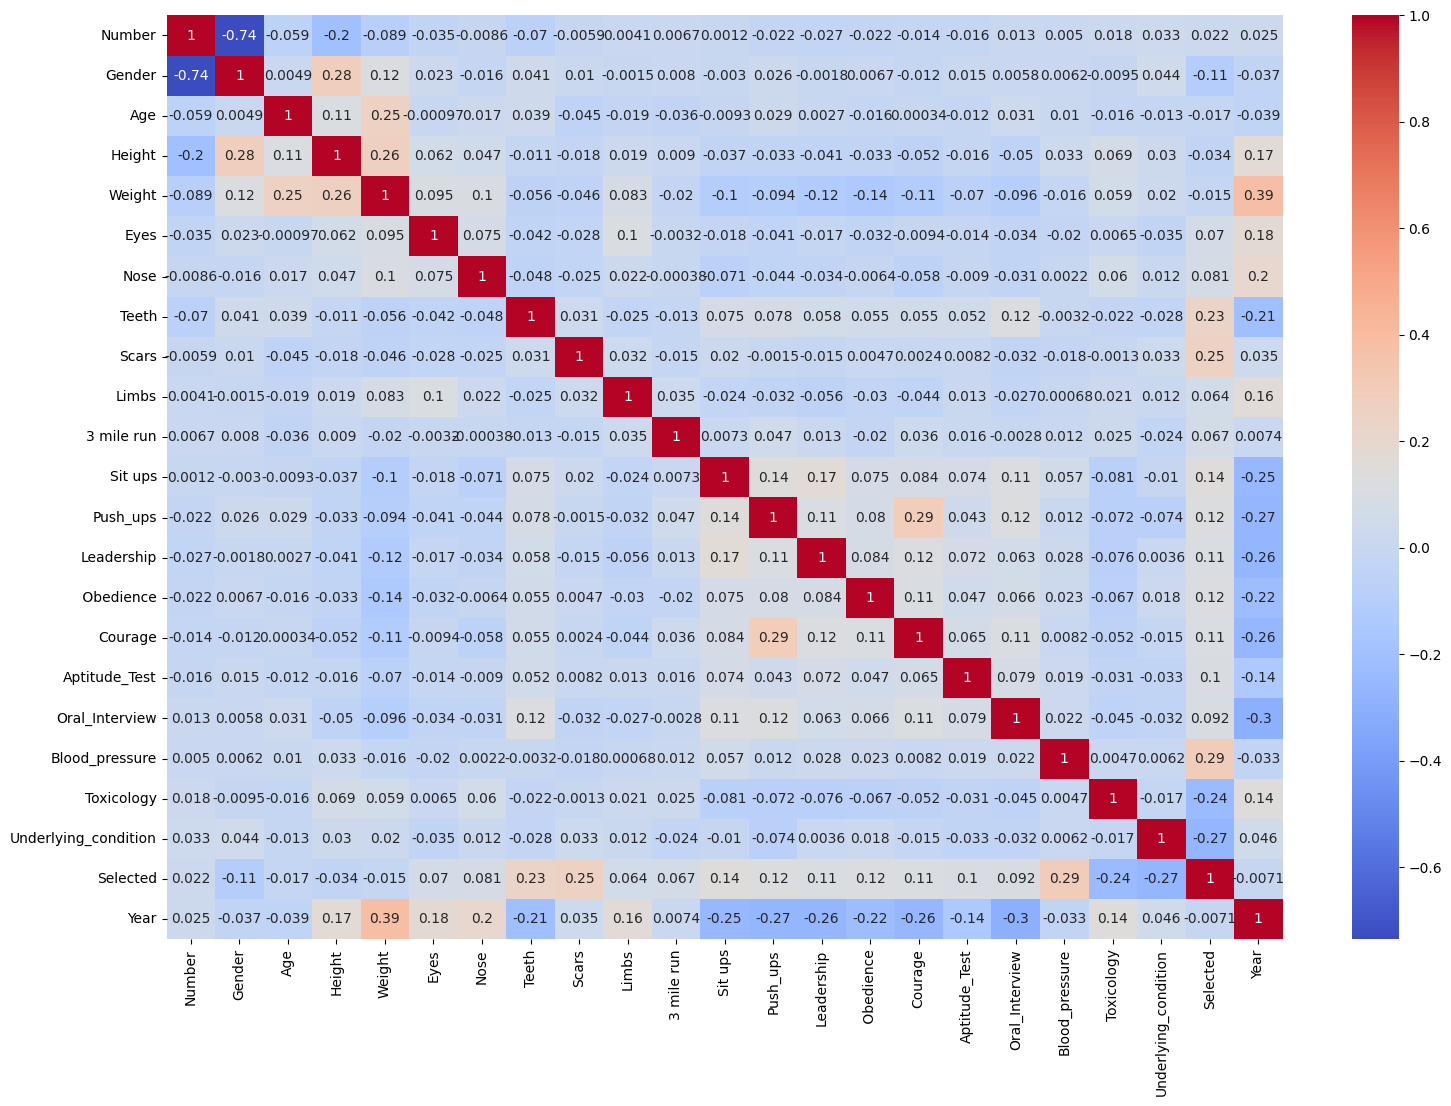

In [157]:
# Heatmap to show correlations
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



In [158]:
# Split the data into training and testing sets
X = df.drop(['Selected','Number','Year'], axis=1)
y = df['Selected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Eyes'}>,
        <Axes: title={'center': 'Nose'}>,
        <Axes: title={'center': 'Teeth'}>,
        <Axes: title={'center': 'Scars'}>,
        <Axes: title={'center': 'Limbs'}>],
       [<Axes: title={'center': '3 mile run'}>,
        <Axes: title={'center': 'Sit ups'}>,
        <Axes: title={'center': 'Push_ups'}>,
        <Axes: title={'center': 'Leadership'}>,
        <Axes: title={'center': ' Obedience'}>],
       [<Axes: title={'center': 'Courage'}>,
        <Axes: title={'center': 'Aptitude_Test'}>,
        <Axes: title={'center': 'Oral_Interview'}>,
        <Axes: title={'center': 'Blood_pressure'}>,
        <Axes: title={'center': 'Toxicology'}>],
       [<Axes: title={'center': 'Underlying_condition'}>,
        <Axes: title={'ce

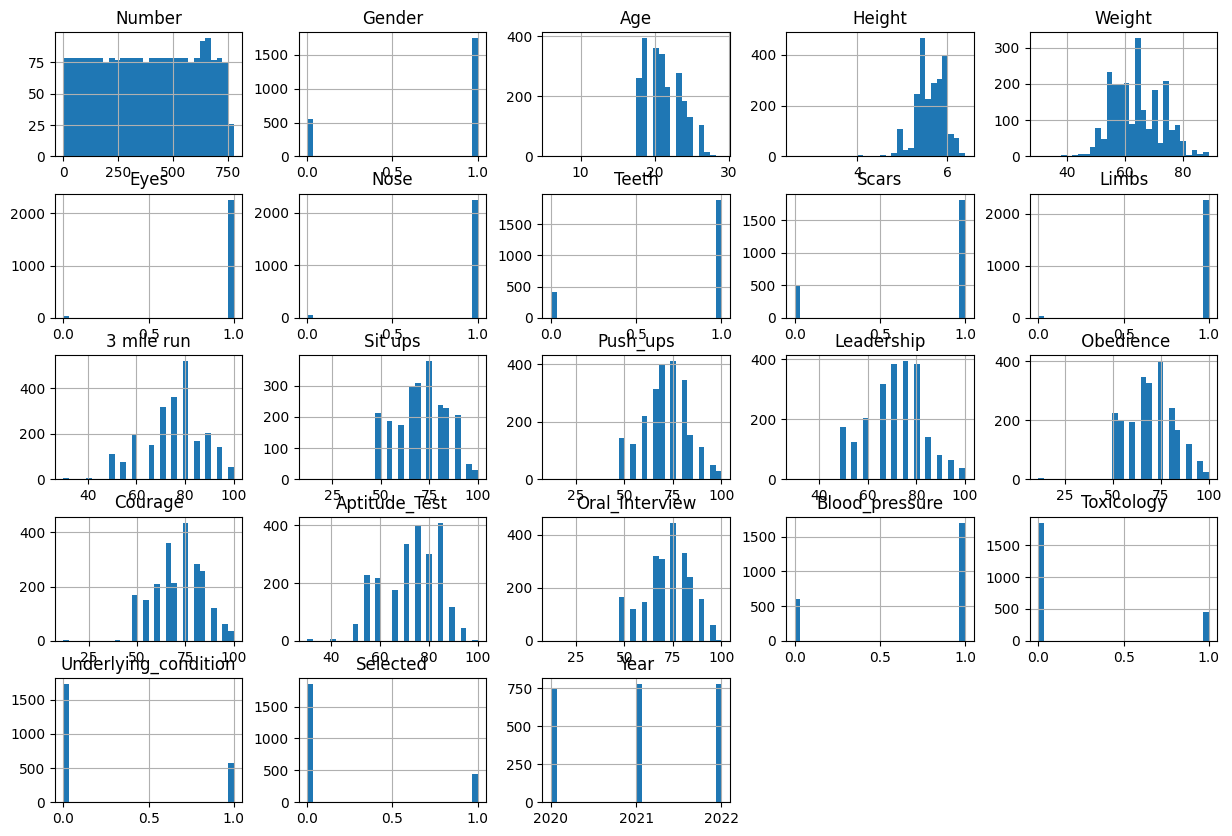

In [159]:
# Histograms for each variable
df.hist(bins=30, figsize=(15, 10))

In [160]:
# Build the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [161]:

# Get feature importances
importances = model.feature_importances_


In [162]:
# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})



In [163]:
# Sort the DataFrame to find out the most important features
feature_importances = feature_importances.sort_values("importance", ascending=False)



In [164]:
# Print the feature importances
print(feature_importances)



                 feature  importance
19  Underlying_condition    0.123626
17        Blood_pressure    0.121498
7                  Scars    0.119743
18            Toxicology    0.096052
6                  Teeth    0.078294
13             Obedience    0.063892
10               Sit ups    0.057653
12            Leadership    0.056247
15         Aptitude_Test    0.047168
9             3 mile run    0.040578
11              Push_ups    0.039654
14               Courage    0.038729
16        Oral_Interview    0.026780
5                   Nose    0.020205
3                 Weight    0.018264
8                  Limbs    0.013627
1                    Age    0.013163
2                 Height    0.012983
4                   Eyes    0.006291
0                 Gender    0.005550


In [165]:
# Make predictions
y_pred = model.predict(X_test)



In [166]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       380
           1       0.96      0.90      0.93        81

    accuracy                           0.98       461
   macro avg       0.97      0.95      0.96       461
weighted avg       0.98      0.98      0.98       461

[[377   3]
 [  8  73]]


In [167]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)



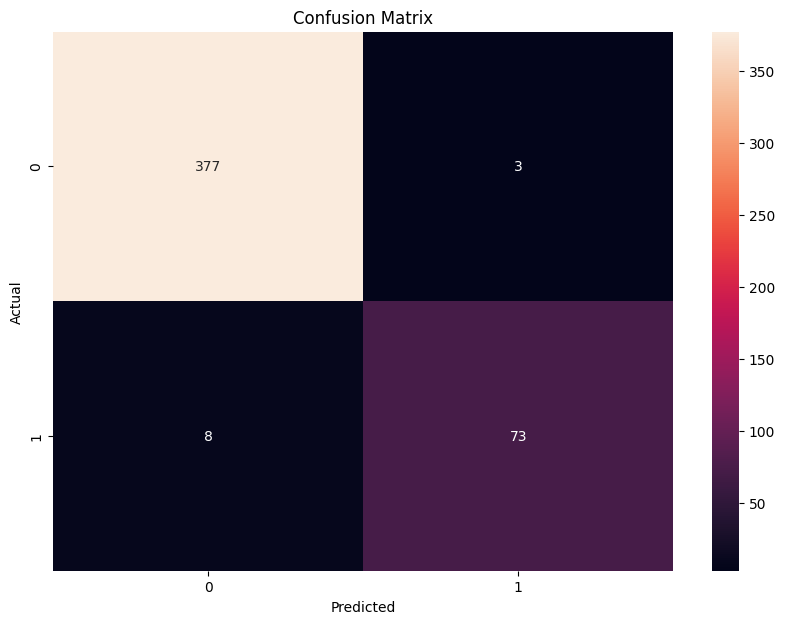

Cross-validation scores: [0.98481562 0.97830803 0.98264642 0.97396963 0.95      ]
Average cross-validation score: 0.9739479392624728


In [168]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

In [169]:
#save the model
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [170]:
X_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Eyes', 'Nose', 'Teeth', 'Scars',
       'Limbs', '3 mile run', 'Sit ups', 'Push_ups', 'Leadership',
       ' Obedience', 'Courage', 'Aptitude_Test', 'Oral_Interview',
       'Blood_pressure', 'Toxicology', 'Underlying_condition'],
      dtype='object')

In [172]:
pd.set_option('display.max_columns', 25)

In [174]:
df[df['Selected']==1].head(2)

,Number,Gender,Age,Height,Weight,Eyes,Nose,Teeth,Scars,Limbs,3 mile run,Sit ups,Push_ups,Leadership,Obedience,Courage,Aptitude_Test,Oral_Interview,Blood_pressure,Toxicology,Underlying_condition,Selected,Year
2,3,1,19,5.9,55,1,1,1,1,1,65,75,65,75,70,65,85,70,1,0,0,1,2022
6,7,1,24,6.1,70,1,1,1,1,1,75,65,80,60,70,80,85,70,1,0,0,1,2022
